<a href="https://colab.research.google.com/github/MJakash/Credit_Card_Fraud_Detection/blob/main/Credit_card_Fraud_Detection_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/My Drive/creditcard.csv'
df = pd.read_csv(file_path)


In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.shape

(284807, 31)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.value_counts()

Time      V1          V2          V3         V4         V5         V6         V7          V8          V9         V10        V11        V12        V13        V14        V15        V16        V17        V18        V19        V20        V21         V22        V23        V24        V25        V26        V27        V28        Amount  Class
163152.0  -1.196037    1.585949    2.883976   3.378471   1.511706   3.717077   0.585362   -0.156001    0.122648   4.217934   1.385525  -0.709405  -0.256168  -1.564352   1.693218  -0.785210  -0.228008  -0.412833   0.234834   1.375790  -0.370294    0.524395  -0.355170  -0.869790  -0.133198   0.327804  -0.035702  -0.858197  7.56    0        18
          -1.203617    1.574009    2.889277   3.381404   1.538663   3.698747   0.560211   -0.150911    0.124136   4.220998   1.384569  -0.706897  -0.256274  -1.562583   1.692915  -0.787338  -0.226776  -0.412354   0.234322   1.385597  -0.366727    0.522223  -0.357329  -0.870174  -0.134166   0.327019  -0.042648  -0.85526

In [ ]:
#checking the number of missing values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
#distribution of genuine vs fraud transactions
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

<ipython-input-15-7ae0584bada6>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Class'])


<Axes: xlabel='Class', ylabel='Density'>

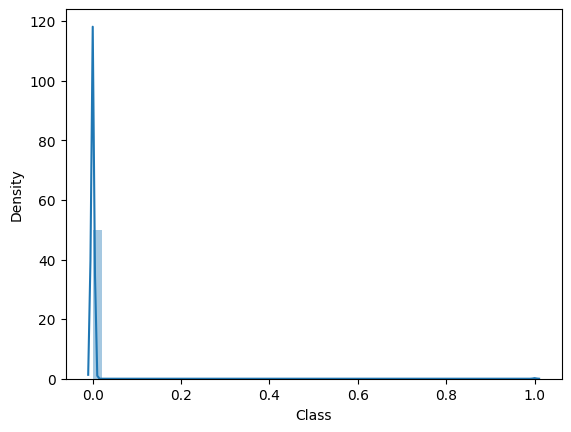

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(df['Class'])

Highly Unbalanced Dataset

In [ ]:
genuine = df[df['Class']==0]
fraud = df[df['Class']==1]

In [ ]:
genuine.shape

(284315, 31)

In [ ]:
fraud.shape

(492, 31)

In [ ]:
genuine.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,...,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.0
mean,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022,0.0
std,47484.015786,1.929814,1.636146,1.459429,1.399333,1.356952,1.329913,1.178812,1.161283,1.089372,...,0.716743,0.723668,0.621541,0.605776,0.520673,0.482241,0.399847,0.329570,250.105092,0.0
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-31.764946,-73.216718,-6.290730,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.0
25%,54230.000000,-0.917544,-0.599473,-0.884541,-0.850077,-0.689398,-0.766847,-0.551442,-0.208633,-0.640412,...,-0.228509,-0.542403,-0.161702,-0.354425,-0.317145,-0.327074,-0.070852,-0.052950,5.650000,0.0
50%,84711.000000,0.020023,0.064070,0.182158,-0.022405,-0.053457,-0.273123,0.041138,0.022041,-0.049964,...,-0.029821,0.006736,-0.011147,0.041082,0.016417,-0.052227,0.001230,0.011199,22.000000,0.0
75%,139333.000000,1.316218,0.800446,1.028372,0.737624,0.612181,0.399619,0.571019,0.326200,0.598230,...,0.185626,0.528407,0.147522,0.439869,0.350594,0.240671,0.090573,0.077962,77.050000,0.0
max,172792.000000,2.454930,18.902453,9.382558,16.875344,34.801666,73.301626,120.589494,18.709255,15.594995,...,22.614889,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,0.0


In [ ]:
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


UNDER-SAMPLING : Building a sample dataset having same distributions of genuine and fraud dataset

In [ ]:
genuine_sample = genuine.sample(n=492)

In [ ]:
df_ = pd.concat([genuine_sample,fraud],axis=0)

In [ ]:
df_.shape

(984, 31)

In [ ]:
df_['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [ ]:
df_.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,93010.806911,0.057835,-0.086304,0.108814,-0.055908,-0.043069,-0.000450,-0.022301,0.021334,0.055280,...,0.003179,-0.010205,-0.002877,-0.004976,0.032497,-0.016645,0.028826,0.002875,0.009724,92.475488
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Splitting the dataset into features and target

In [ ]:
X = df_.drop(columns='Class',axis=1)
Y = df_['Class']

In [ ]:
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
102036,68030.0,1.146710,0.387415,0.876354,2.749856,-0.357018,-0.146182,-0.046220,-0.015518,-0.203953,...,-0.162434,-0.076194,-0.036209,-0.085675,0.395055,0.625371,0.077413,0.007967,0.021302,9.83
195603,131141.0,-1.872989,0.804624,0.214743,-0.823345,-0.291562,1.250221,0.140679,1.126828,-0.276805,...,-0.034227,-0.154139,-0.708760,-0.298264,-0.736296,0.539617,-0.362367,0.060297,-0.158140,183.81
44952,42148.0,1.074653,-0.738946,0.256741,-0.829781,-0.988899,-0.537501,-0.394621,0.115423,1.653995,...,-0.058049,0.056576,0.076984,-0.208598,-0.012704,0.587783,-0.626065,0.037617,0.024302,92.50
146139,87482.0,-1.174896,1.905426,-0.728222,-1.035514,1.032997,-0.814066,1.486050,-0.665283,1.813895,...,1.075396,-0.730550,-0.967731,0.066470,0.432812,-0.133121,0.068382,0.455808,-0.115401,8.99
158183,111059.0,-0.640388,-0.037431,1.474768,-2.996923,-0.183291,-0.319480,0.000018,-0.115112,-1.323880,...,-0.152884,-0.325338,-0.192489,-0.445473,-0.459464,0.815285,-0.141456,0.234230,0.087962,15.00


In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size =0.2,stratify=Y,random_state=42)

In [ ]:
X_train.shape

(787, 30)

#Model Training

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train,Y_train)

LogisticRegression()

In [ ]:
X_train_pred = model.predict(X_train)
print("training_data_accuracy",accuracy_score(X_train_pred,Y_train))

training_data_accuracy 0.9161372299872935


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
precision = precision_score(X_train_pred,Y_train)
recall = recall_score(X_train_pred,Y_train)
f1 = f1_score(X_train_pred,Y_train)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')

Precision: 0.883248730964467
Recall: 0.9456521739130435
F1-score: 0.9133858267716536


In [ ]:
print(f' {classification_report(X_train_pred,Y_train)}')

               precision    recall  f1-score   support

           0       0.95      0.89      0.92       419
           1       0.88      0.95      0.91       368

    accuracy                           0.92       787
   macro avg       0.92      0.92      0.92       787
weighted avg       0.92      0.92      0.92       787



In [ ]:
X_test_pred = model.predict(X_test)
print("testing_data_accuracy",accuracy_score(X_test_pred,Y_test))

testing_data_accuracy 0.934010152284264


In [ ]:
precision = precision_score(X_test_pred,Y_test)
recall = recall_score(X_test_pred,Y_test)
f1 = f1_score(X_test_pred,Y_test)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')

Precision: 0.9387755102040817
Recall: 0.9292929292929293
F1-score: 0.934010152284264


In [ ]:
print(f' {classification_report(X_test_pred,Y_test)}')

               precision    recall  f1-score   support

           0       0.93      0.94      0.93        98
           1       0.94      0.93      0.93        99

    accuracy                           0.93       197
   macro avg       0.93      0.93      0.93       197
weighted avg       0.93      0.93      0.93       197

